# AMAT 502: Modern Computing for Mathematicians
## Lecture 15 - Exponential Data, The Curse of Dimensionality and Introduction to Pandas
### University at Albany SUNY

# Recap on Supervised Learning

In **supervised learning** we are given **labeled data**.
- When the labels are continuously varying and have *numerical interpretations*, like height or weight, we use **regression**
- When the labels are discrete and have *categorical interpretations*, like Democrat or Republican, we use **classification**

## How Regression is Done in Python

### Linear Regression
The simplest form of regression is linear regression where we try and find a line that 'best fits' our dataset. 

This means that we want to compare a dependent variable $y$ from our dataset and an independent variable $x$ with a linear model:

$$y = mx + b $$

### Multi-Dimensional Linear Regression

Alternatively, we can assume that the dependent variable $y$ depends on a vector $\mathbf{x}=(x_1,x_2,\ldots,x_n)$

This implies a model like

$$y = \beta_0 + \mathbf{\beta}\cdot\mathbf{x} = \beta_0 + \beta_1x_1 + \beta_2 x_2 + \cdots \beta_n x_n $$

Geometrically, this is us finding the best fitting hyper-plane of dimension $n$

### Polynomial Regression

The way Python does polynomial regression is that it turns a one dimensional regression problem, i.e. where we have only one scalar independent variable $x$ and turns it into an $n$-dimensional regression problem, by applying the transformation

$$\Phi(x) = \begin{bmatrix} x \\ x^2 \\ \vdots \\ x^n\end{bmatrix}$$

And now multi-dimensional regression on $\Phi(x)$ looks like

$$y = \beta_0 + \mathbf{\beta}\cdot\Phi(x) =  \beta_0 + \beta_1x + \beta_2 x^2 + \cdots \beta_n x^n $$

Notice that this turns a polynomial regression problem in one variable into a linear regression problem in $n$-variables.

## Regression for the Fibonacci Numbers

Recall that we used regression in order to predict the next number in an integer sequence.

For **Fibonacci numbers**, i.e. those numbers that satisfy the recursion relation $$F_{n} = F_{n-1} + F_{n-2}$$
where $F_0=1$ and $F_1=1$, we can ask whether a polynomial fits this sequence of numbers. 

We'll do this via the **Train-Model-Predict** paradigm.

## Train-Model-Predict Paradigm for Fibonacci Numbers
For our Fibonacci sequence case study we will be...
- **Training** on the first 20 Fibonacci numbers
- **Modelling** with a polynomial of $$f(x)=\beta_0 + \beta_1 x + \cdots + \beta_n x^{n}$$
    - Using the sum of squared errors (or residuals) we'll choose different $n$ to get a better model
    - Beware of overfitting and underfitting
- **Predicting** the 21st Fibonacci numbers


In [1]:
def fib(n):
    if n<=1:
        return 1
    else:
        return fib(n-1)+fib(n-2)
fib(5)

def fibList(n):
    return [fib(i) for i in range(n)]

len(fibList(20))

X= [[i] for i in range(20)]
y=[[j] for j in fibList(20)]
y # Shows that we like to think of data as a column vector

[[1],
 [1],
 [2],
 [3],
 [5],
 [8],
 [13],
 [21],
 [34],
 [55],
 [89],
 [144],
 [233],
 [377],
 [610],
 [987],
 [1597],
 [2584],
 [4181],
 [6765]]

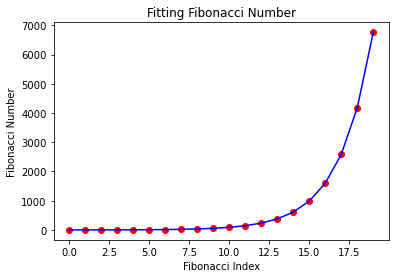

Our sum of square errors is [0.06404079]
Our prediction for the next Fibonacci number is [[17716.1218906]]
Our actual next Fibonacci number is 17711
Our error in predicting the next Fibonacci number is [[-5.1218906]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=12)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Fitting Fibonacci Number')
    plt.xlabel('Fibonacci Index')
    plt.ylabel('Fibonacci Number')
    plt.show()
    return
viz_polymonial();
y_pred=pol_reg.predict(poly_reg.fit_transform(X)) ## predicted values
print("Our sum of square errors is",sum((y_pred - y)**2)) ## sum of squared error
y_pred_next = pol_reg.predict(poly_reg.fit_transform([[21]]))
print("Our prediction for the next Fibonacci number is",y_pred_next)
print("Our actual next Fibonacci number is",fib(21))
print("Our error in predicting the next Fibonacci number is",fib(21)-y_pred_next)

## The Fibonacci Numbers Revisited

This is an important case study because not every number sequence follows a polynomial growth.

In fact it is well known that $$\lim_{n \to \infty} \frac{F_{n+1}}{F_n} = \varphi = {\frac {1+{\sqrt {5}}}{2}}=1.6180339887\dots$$ 

If we take the "discrete derivative" of $F_n$, written $dF_n$, then in the limit we have
$$dF_n = \frac{F_{n+1} - F_n}{(n+1)-n} \approx \varphi F_n - F_n \qquad \Rightarrow \qquad dF_n = F_n(\varphi -1)$$

Anytime the rate of growth is proportional to the value of the function, you should expect **exponential** (not polynomial!) growth...

### A Closed Form Formula

All of the above is what you might call a "back of the envelope" calculation. It's a heuristic and not very precise.

Luckily there is a closed form-formula that proves that the Fibonacci sequence does not grow as a polynomial of fixed degree:

$$F\left(n\right)={{\varphi ^{n}-(1-\varphi )^{n}} \over {\sqrt {5}}}={{\varphi ^{n}-(-\varphi )^{-n}} \over {\sqrt {5}}}.$$

# Recap on Classification

In our last lecture we considered two forms of classification:
- Linear Classifiers
- K-Nearest Neighbors Classifiers

## Linear Classifiers

In a **linear classifier** the **model** is that a hyperplane separates data that has one of two classes: red and blue.

When we **train,** we're trying to find a hyperplane that maximizes distance from the nearest red point and nearest blue point.

Our **prediction** step then tests new samples by computing the dot product with the normal vector and comparing with the displacement $d$.

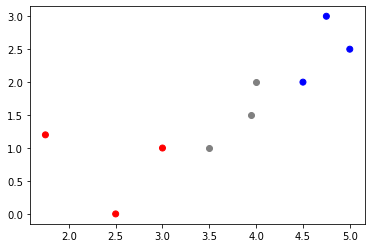

In [8]:
# Following code from https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
import matplotlib.pyplot as plt
import numpy as np

## Training Data
X_train = np.array([[1.75,1.2], [2.5,0], [3,1], [4.5,2], [4.75,3], [5,2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
## Setting Colors for the Training Data
color_dict = {0: 'red',1:'blue'}
train_Colors = [ color_dict[i] for i in y_train]
## Plotting the Training Data
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_Colors)

## Testing Data
X_test = np.array([[3.5,1],[3.95,1.5],[4,2]])
## Plotting Testing Data
plt.scatter(X_test[:,0],X_test[:,1],c='gray');

In [9]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
clf.decision_function(X_test)

array([-0.53846154,  0.18461538,  0.53846154])

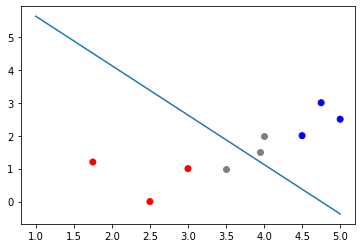

In [11]:
## Previous Plot infor
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_Colors)
## Testing Data
X_test = np.array([[3.5,1],[3.95,1.5],[4,2]])
## Plotting Testing Data
plt.scatter(X_test[:,0],X_test[:,1],c='gray')
## Plotting the Decision Boundary for our Classifier
# Following https://stackoverflow.com/questions/23794277/extract-decision-boundary-with-scikit-learn-linear-svm
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py


## Little Bit of Code
W=clf.coef_[0]

I=clf.intercept_

def decision_boundary(x):
    a = -W[0]/W[1]
    b = I[0]/W[1]
    return a*x - b

## Actually plotting
x_dec_bdy = np.linspace(1,5,10)
plt.plot(x_dec_bdy,decision_boundary(x_dec_bdy));

## Drawbacks of Linear Classifiers

- Sometimes data is not linearly separable.
- For more than two classes of data you need multiple hyperplanes

## Case Study in KNN

In **K-nearest neighbors** our model is that our $k$ closest points are the best predictors of a test sample's class label.

Let's reconsider the red and blue point model and run KNN on it to predict our class labels for the grey points.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1]


## Drawbacks of KNN

- If you let $K$ be too large, then then the prediction simply comes from which class dominates in the samples and forgets geometry.

- For high-dimensional data, geometry is harder to use because points increasingly look like their the same distance away. This is known as the **curse of dimensionality**.

## The Curse of Dimensionality

The $n$-ball of radius $r$ is defined as the set of points in $\mathbb{R}^n$ such that $$B_n(r):=\{\mathbf{x}=(x_1,x_2,\ldots,x_n) \mid |\mathbf{x}|^2_{\ell_2} < r\}$$

The **unit $n$-ball** is the ball of radius 1.

### In dimension... the volume is...
For the unit ball we have the following pattern:
- For $n=1$, the volume (length) is 2
- For $n=2$, the volume (area) is $\pi$, because $\pi r^2$ is the formula for area.
- For $n=3$, the volume is $\frac{4 \pi}{3}$ because $4\pi r^3/3$ is the formula for the volume of a ball.

### The General Formula
In general, the volume of the $n$-ball of radius $r$ is
$$V_{n}(r)={\frac {\pi ^{\frac {n}{2}}}{\Gamma \left({\frac {n}{2}}+1\right)}}r^{n}$$
Here $\Gamma$ is the **gamma function,** which is the continuous extension of the factorial to the non-negative reals.

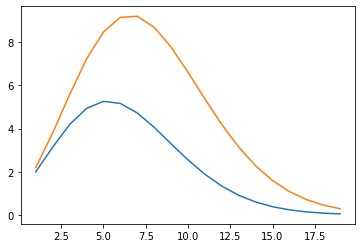

In [12]:
import math

def volume_of_hypersphere(rad,dim):
    return (math.pi**(dim/2)/math.gamma(dim/2 + 1))*rad**dim

volume_of_hypersphere(1,3)
dims = np.arange(1,20)
vols = np.array([ volume_of_hypersphere(1,i) for i in dims])
vols2 = np.array([ volume_of_hypersphere(1.1,i) for i in dims])
plt.plot(dims,vols);
plt.plot(dims,vols2);

## Volume in the Shell

The curse of dimensionality comes from the fact that the percentage of the volume that lies between .9 and 1 quickly approaches 100%

In...
- dimension 5, 40% of the volume is between distance .9 and 1 away from the center.
- dimension 10, 65% of the volume is between distance .9 and 1
- dimension 15, 79% of the volume is between .9 and 1 of the radius
- dimension 20, 87.8% of the volume is there
- dimension 25, 92.8% of the volume is there

### The Upshot of the Curse of Dimensionality
Since data looks more and more equidistant from one another, KNN is probably more inaccurate for data in dimensions 20 and higher!

0.9282102012308147

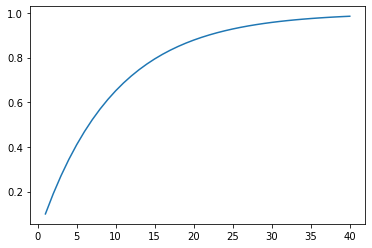

In [13]:
more_dims = np.arange(1,41)
full_volume = np.array([ volume_of_hypersphere(1,i) for i in more_dims])
inner_volume = np.array([ volume_of_hypersphere(.90,i) for i in more_dims])
volume_in_shell = full_volume-inner_volume
percent_volume = volume_in_shell/full_volume
plt.plot(more_dims,percent_volume)
percent_volume[24]

# Introduction to Pandas

* Python library built on NumPy 

* Pandas objects can be thought of as enhanced NumPy structured arrays in which the row and columns are identified with labels instead of just indices

## Series

A Pandas **Series** object is a one-dimensional array of indexed data (with any countable, finite indexing set).

This means that **Series** wraps both a sequence of values and a sequence of indices.

For example:

In [14]:
import pandas as pd
#Defining a Series object
some_data = pd.Series([0.0,0.25,0.5,0.75,1.0], index = ['red','yellow','green','blue','purple'])
some_data

red       0.00
yellow    0.25
green     0.50
blue      0.75
purple    1.00
dtype: float64

In [15]:
#retrieving Series values
print(some_data.values)
#retrieving Series index
print(some_data.index)
#retrieving Series element by index
some_data['yellow']

[0.   0.25 0.5  0.75 1.  ]
Index(['red', 'yellow', 'green', 'blue', 'purple'], dtype='object')


0.25

### Series as Dictionaries

Series may seem like the same thing as a Python dictionary, however for certain operations (array - style operations in particular) **Pandas series objects are much more efficient.** 

Pandas *can* take in a dictionary and use its values and indices to create a series object 

In [16]:
import pandas as pd
#Dictionary
population_dict = {'California':38332521,'Texas':26448193, 'New York': 19651127, 'Florida':19552860, 'Illinois': 12882135}

#Series
population = pd.Series(population_dict)

#population_dict['California': 'New York']
population['California':'New York']


California    38332521
Texas         26448193
New York      19651127
dtype: int64

### DataFrames

Like the series object, a Pandas **DataFrame** object can be thought of as either a generalization of a NumPy array OR a Python dictionary. 

To better understand DataFrames, let's use a Series object to build up a dataFrame.

In [17]:
area_dict = {'California':423967,'Texas':695662, 'New York': 141297, 'Florida':170312, 'Illinois': 129995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      129995
dtype: int64

In [18]:
states = pd.DataFrame({'population': population,'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,129995


In [19]:
print(states.index)
print(states.columns)
print(states.values)

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
Index(['population', 'area'], dtype='object')
[[38332521   423967]
 [26448193   695662]
 [19651127   141297]
 [19552860   170312]
 [12882135   129995]]


In [20]:
#Defined using dictionary
df1 = pd.DataFrame({"a":[4,5,6], "b": [7,8,9], "c":[10,11,12]}, index = [1,2,3])
print(df1)

#Defined using lists
df2 = pd.DataFrame([[4,7,10],[5,8,11],[6,9,12]],index = [1,2,3], columns = ['a','b','c'])
print(df2)

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12


### Indexing

Since we have two sets of labels, both for rows and columns, we need to be careful about how we parse through the DataFrame objects.

In [21]:
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,129995


### Returning Columns

In order to select a column in a DataFrame, we can access the columns by calling them by their columns name.

In [22]:
states[['population']]

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [23]:
#Getting two columns
df2[['a','b']]

,a,b
1,4,7
2,5,8
3,6,9


### Returning Rows

Pandas provide a unique method to retrieve rows from a Data frame. *DataFrame.loc[]* method is used to retrieve rows from Pandas DataFrame. Rows can also be selected by passing integer location to an *iloc[]* function.


In [24]:
#parameters are using the implicit index
states.iloc[:3,:1]

,population
California,38332521
Texas,26448193
New York,19651127


In [25]:
#return rows across all columns, just like you would with a list
states[:]

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,129995


In [26]:
#parameters use explicit indexing
states.loc[:'New York',:"area"]

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


In [27]:
#append a new column
states['density'] = states['population']/states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,129995,99.097158


In [28]:
#return a specific cell
print(states.iloc[1,2])

print(states.loc['Texas','density'])

38.01874042279153
38.01874042279153


### Using Comparison Operations

We can also return values that satisfy a given comparison operation

In [29]:
#Comparing all values
states[states > 100]

,population,area,density
California,38332521,423967,NaN
Texas,26448193,695662,NaN
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,129995,NaN


In [30]:
#Comparing specific values
states[states.area > 180000]

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740


### Statistics

* **Mean:** The average values of a data set

* **Variance:** A measure of how spread out the data is on average

* **Standard Deviation:** The square root of the variance (so it is still a measure of deviation from the mean)


In [31]:
#mean
print(df1.mean())

#standard deviation
print(df1.std())

df1
#states.mean()

a     5.0
b     8.0
c    11.0
dtype: float64
a    1.0
b    1.0
c    1.0
dtype: float64


,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


### Statistics

* **Covariance:** Measures the total variation of two random variables from their expected values. Using covariance, we can only gauge the direction of the relationship (whether the variables tend to move in tandem or show an inverse relationship, i.e., positive or negative covariance).

* **Correlation Coefficient**, $r$: Correlation shows the linear relationship between any two array of values

In [32]:
#covariance
print(states['population'].cov(states['area']))

#correlation coefficient
print(states['population'].corr(states['area']))

print(states.cov())
print(states.corr())
states

1485199924794.85
0.6262485633149357
              population          area       density
population  9.293703e+13  1.485200e+12 -1.316323e+08
area        1.485200e+12  6.051841e+10 -8.363160e+06
density    -1.316323e+08 -8.363160e+06  1.402875e+03
            population      area   density
population    1.000000  0.626249 -0.364551
area          0.626249  1.000000 -0.907647
density      -0.364551 -0.907647  1.000000


,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,129995,99.097158


### Basic Plotting

The three easiest plots to use in the Pandas library are histograms, scatter plots, and line graphs.

In [33]:
# Following https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
data = pd.read_csv(url, names=names)

In [34]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:title={'center':'Iris Histogram'}, ylabel='Frequency'>

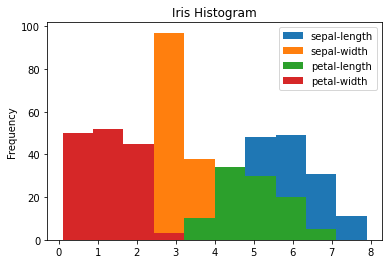

In [35]:
data.plot(kind = 'hist', title = 'Iris Histogram')

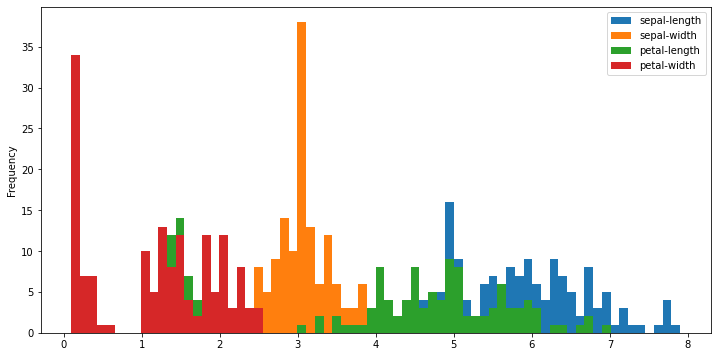

In [36]:
data.plot(kind = 'hist', bins = 70, figsize = (12,6));

<AxesSubplot:ylabel='Frequency'>

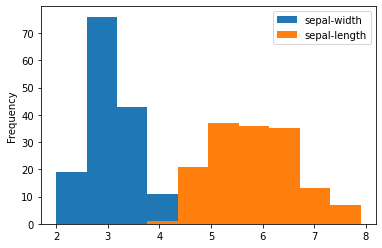

In [37]:
data[['sepal-width','sepal-length']].plot(kind = 'hist')

<AxesSubplot:>

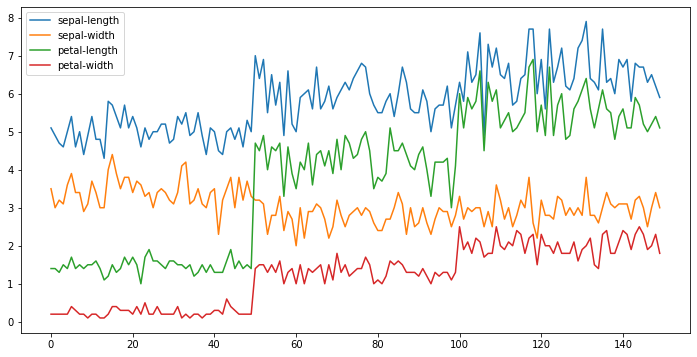

In [38]:
data.plot(kind = 'line',figsize = (12,6))

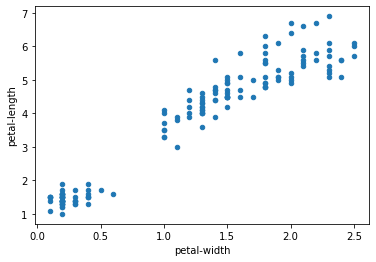

In [39]:
data.plot.scatter(x = 'petal-width',y = 'petal-length');

<ipython-input-40-058fb2a34f72>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(x[:, np.newaxis],y)


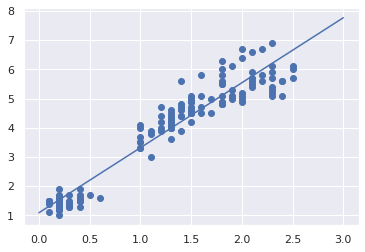

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

x = data['petal-width']
y = data['petal-length']

model.fit(x[:, np.newaxis],y)
#model.fit(x,y) <-- WRONG CODE

xfit = np.linspace(0,3,100)
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x,y);
plt.plot(xfit,yfit);

In [41]:
print('Model slope:  :', model.coef_[0])
print('Model intercept :', model.intercept_)
print('Regression Line . :',model.coef_[0],'* x + ',model.intercept_ )
print('R^2 value: ', model.score(x[:, np.newaxis],y)) # explain a little

Model slope:  : 2.225885306553911
Model intercept : 1.090572145877378
Regression Line . : 2.225885306553911 * x +  1.090572145877378
R^2 value:  0.9269012279220037


<ipython-input-41-1c98bf1a7fee>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print('R^2 value: ', model.score(x[:, np.newaxis],y)) # explain a little


## Cheat Sheat References:

* https://assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf